# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

#observations:
#1. Capomulin and Ramicane show a better treatment result comparing to Infubinol and Ceftamin based on the box plot.
#2. based on the linear regression, the weight of the mouse and the size of tumor has a positive relationship. 
#3. based on the observation of I509 (Capomulin0, the tumor size did decrease as time passed but the tumor size increased again after 30 days of the treatment. 



In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [70]:
# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge_df = merge_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)','Metastatic Sites','Drug Regimen',
                    'Sex','Age_months','Weight (g)']]

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [71]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateID = duplicateRows['Mouse ID'].unique()
duplicateID

array(['g989'], dtype=object)

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df_duplicate = merge_df.loc[merge_df["Mouse ID"]=="g989",:]
merge_df_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicateID) == False] 
clean_df.head () 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_df.groupby("Drug Regimen")
Mean_Tumor_Volume = drug_group['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = drug_group['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = drug_group['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Var = drug_group['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err = drug_group['Tumor Volume (mm3)'].sem()
summary_Stat = pd.DataFrame(
    {"Mean Tumor Volume": Mean_Tumor_Volume,
     "Median Tumor Volume": Median_Tumor_Volume,
     "Tumor Volume Variance":Tumor_Volume_Variance,
     "Tumor Volume Std. Dev.": Tumor_Volume_Std_Err,
     "Tumor Volume Std. Err.": Tumor_Volume_Std_Err,
     })

summary_Stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

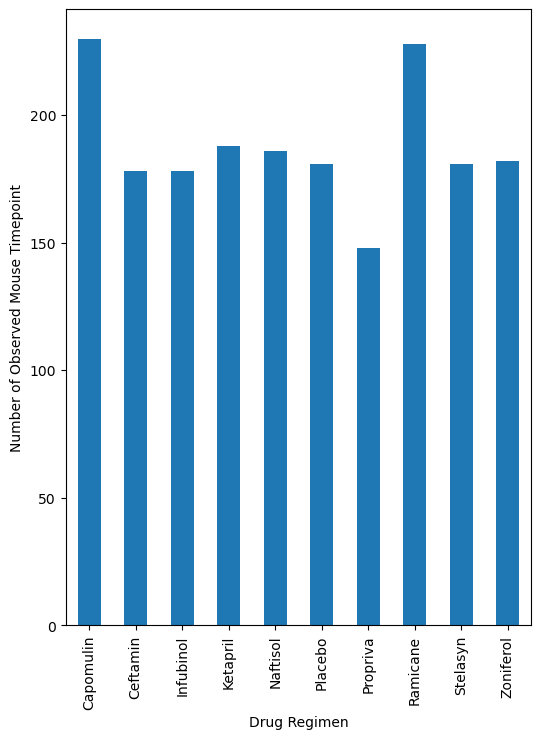

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mouse = drug_group["Mouse ID"].count()

# Create a bar chart based off of the group series from before
count_chart = count_mouse.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Observed Mouse Timepoint")

plt.show()



In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#generate count for total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mouse = drug_group["Mouse ID"].count()
count_mouse

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [80]:
#convert to the count table to a dataframe
count_mouse_df = pd.DataFrame(count_mouse)
count_mouse_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


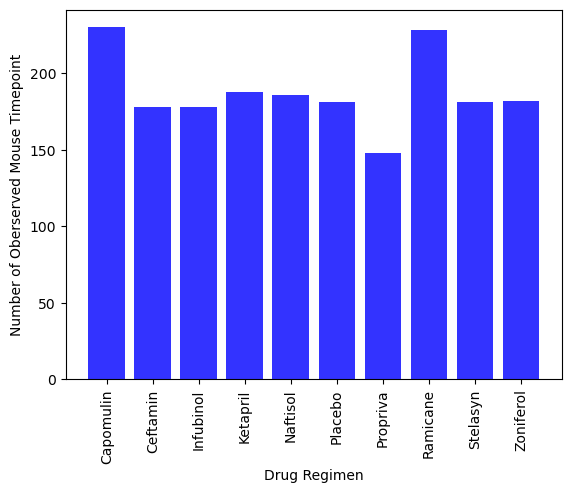

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_mouse_df.index.values, count_mouse_df['Mouse ID'], color = "blue",alpha=0.8, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Oberserved Mouse Timepoint')
plt.xticks(rotation = "vertical")
plt.show()

<Axes: ylabel='Sex'>

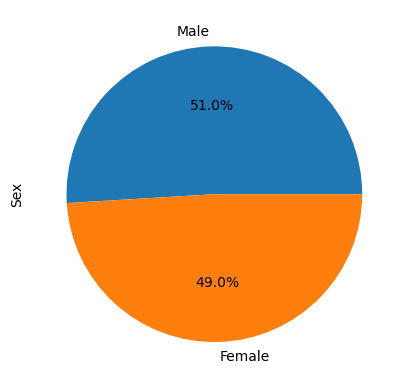

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()
sex_chart = sex_count.plot(kind='pie', autopct='%.1f%%')
sex_chart.set_ylabel("Sex")
sex_chart

In [83]:
#convert count value to dataframe
sex_count = pd.DataFrame(clean_df['Sex'].value_counts())
sex_count

,count
Sex,
Male,958
Female,922


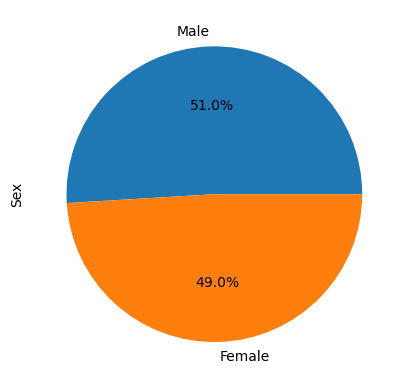

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = sex_count.index.values
sizes = sex_count['count']
plt.pie(sizes,labels=label, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_df = pd.merge(clean_df, max_timepoint, on = "Mouse ID")
merge_max_df.rename(columns={"Timepoint_y":"max timepoint"},inplace=True)
merge_max_df.reset_index(drop=True)


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_value = []

In [89]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    #create datafrane for that contain only max time point for the specific treatment
    temp_df =merge_max_df.loc[merge_max_df['Drug Regimen'] == treatment]
    final_volume_df = temp_df.loc[temp_df['Timepoint_x'] == temp_df['max timepoint']]
    
    # Create a series that consists of all final volume values for each 
    values = final_volume_df['Tumor Volume (mm3)']
    treatment_value.append(values)
    
    # set quartiles 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
    # # Determine outliers using upper and lower bounds
    outlier = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)])                       
    print(f'{treatment} outliers:{outlier}')


Capomulin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers:214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


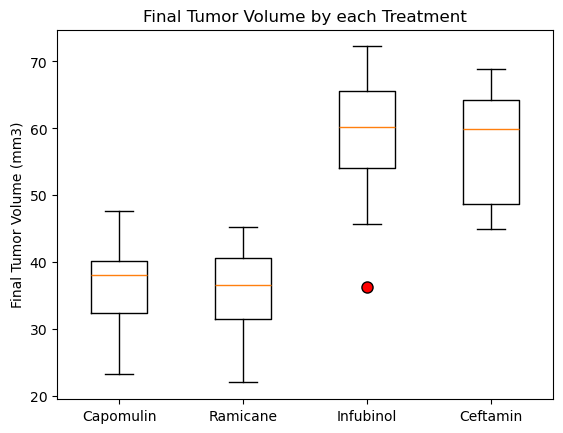

In [90]:
outlier_marker = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(treatment_value, flierprops = outlier_marker )

# Add title and labels to boxplot
plt.title('Final Tumor Volume by each Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#get the dataset for I509
mouse_l509 = clean_df.loc[(clean_df["Mouse ID"] == "l509"), :]
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


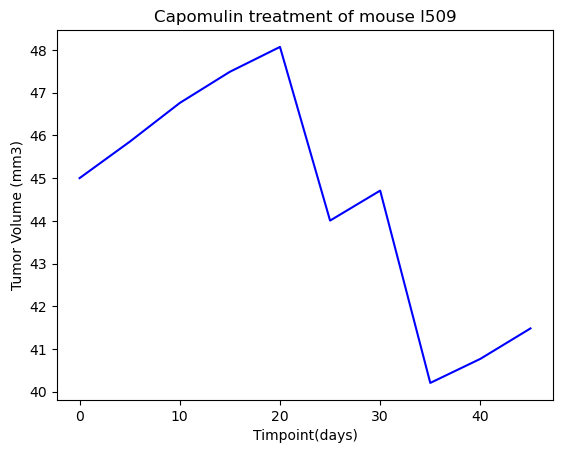

In [63]:
#plot graph
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timpoint(days)")
plt.ylabel("Tumor Volume (mm3)")
mouse_509_graph, = plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], color="blue")
plt.show()


In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#cacluate average tumor based on different mouse ID for Capomul 
Capomul_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), :]
Capomul_group = Capomul_df.groupby("Mouse ID")
Capomul_Mean_Tumor_Volume = Capomul_group['Tumor Volume (mm3)'].mean()
Capomul_Mean_weight = Capomul_group['Weight (g)'].mean()
Capomul_summary_Stat = pd.DataFrame(
    {"Average Tumor Volume (mm3)": Capomul_Mean_Tumor_Volume,
     "Weight(g)": Capomul_Mean_weight })
Capomul_summary_Stat   

,Average Tumor Volume (mm3),Weight(g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


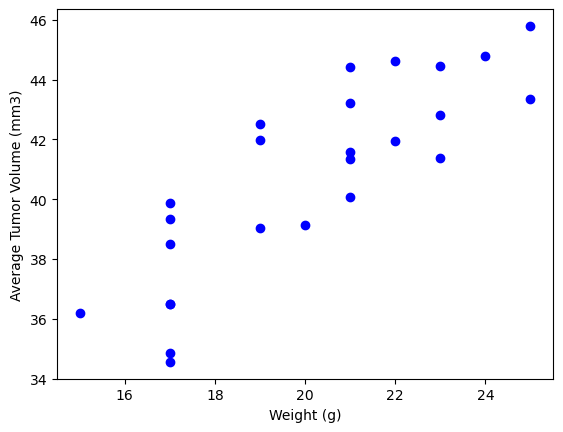

In [65]:
# plot scatter graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(Capomul_summary_Stat['Weight(g)'], Capomul_summary_Stat['Average Tumor Volume (mm3)'], marker="o", color="blue")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


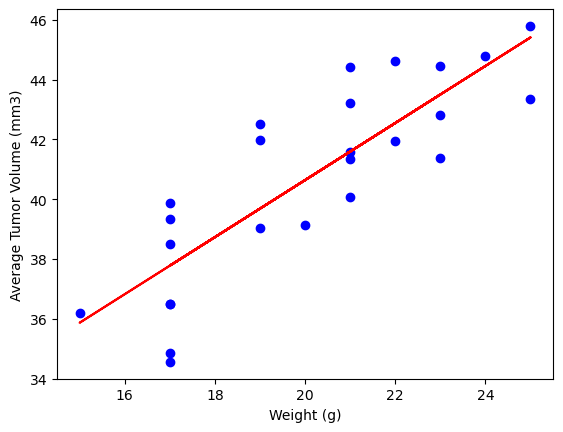

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = Capomul_summary_Stat['Weight(g)']
average_tumor =  Capomul_summary_Stat['Average Tumor Volume (mm3)']
plt.scatter(weight, average_tumor, marker="o", color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(weight,average_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Perform a linear regression on mouse weight and average 
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, average_tumor)
pe_fit = pe_slope * weight + pe_int
plt.plot(weight,pe_fit,"-",color = "red")

plt.show()